# Adaptive linear neurons

Adaline was published by Bernard Widrow and his doctoral student Tedd Hoff, only a few years after Frank Rosenblatt's perceptron algorithm, and can be considered as an improvement on the latter. The Adaline algorithm is particularly interesting because it illustrates the key concepts of defining and minimizing continuous cost functions. This lays the groundwork for understanding more advanced machine learning algorithms for classification, such as logistic regression, support vector machines, and regression models.

The key difference between the Adaline rule (also known as the Widrow-Hoff rule) and Rosenblatt's perceptron is that the weights are updated based on a linear activation function rather than a unit step function like in the perceptron. In Adaline, this linear activation function is simply the identity function $\phi(z)$ of the net input, so that:

\begin{equation*}
\phi \left( w^Tx \right) = w^t x
\end{equation*}

While the linear activation function is used for learning the weights, we still use a threshold function to make the final prediction. The main differences between the perceptron and Adaline algorithm are highlighted in the following figure:

<img src="images/perceptron_adaline.jpeg" alt="Perceptron and Adaline" title="Perceptron and Adaline" width="350" height="250" >

## minimizing cost functions

One of the key ingredients of supervised machine learning algorithms is a defined **objective function** that is to be optimized during the learning process. In the case of Adaline, we can define the cost function $j$ to learn the weights as the **Sum of Squared Errors (SSE)** between the calculated outcome and the true class label :

\begin{equation*}
j(w) = \frac{1}{2} \sum_i \left( y^{(i)} - \phi \left( z^{(i)}\right) \right)^2
\end{equation*}

The main advantage of this continuous linear activation function, in contrast to the unit step function, is that the cost function becomes differentiable.  Another nice property of this cost function is that it is convex, so we can use the **gradient descent** algorithm to find the weights that minimize our cost function to classify the samples in the Iris dataset. As illustrated in the following figure, we can describe the main idea behind gradient descent as climbing down a hill until a local or global cost minimum is reached.

<img src="images/gradient_descent.jpeg" alt="Gradient descent" title="Gradient descent" width="350" height="250" >

Using gradient descent, we can now update the weights by taking a step in the opposite direction of the gradient $\nabla j(w)$ of our cost function $j(w)$ :

\begin{equation*}
w := w + \Delta w
\end{equation*}

Where the weight change $\Delta w$ is defined as the negative gradient multiplied by the learning rate $\eta$ :

\begin{equation*}
\Delta w = -\eta \nabla J (w)
\end{equation*}

To compute the gradient of the cost function, we need to compute the partial derivative of the cost function with respect to each weight $w_j$:

\begin{equation*}
\frac{\partial J}{\partial w_j} = -\sum_i \left(y^{(i)} - \phi \left(z^{(i)} \right ) \right )x_j^{(i)}
\end{equation*}

So that we can write the update of weight $w_j$ as:

\begin{equation*}
\Delta w_j = -\eta \frac{\partial J}{\partial w_j} = \eta \sum_i \left(y^{(i)} - \phi \left(z^{(i)} \right ) \right ) x_j^{(i)}
\end{equation*}

Since we update all weights simultaneously, our Adaline learning rule becomes:

\begin{equation*}
w := w + \Delta w
\end{equation*}

Although the Adaline learning rule looks identical to the perceptron rule, we should note that the $\phi (z^{(i)}$ is a real number and not an integer class label. Furthermore, the weight update is calculated based on all samples in the training set (instead of updating the weights incrementally after each sample), which is why this approach is also referred to as **batch gradient descent**.

# Adaline Python Implementation

In [1]:
import numpy as np


class AdalineGD(object):
    """ADAptative Linear Neuron classifier. """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        """
        Perceptron classifier.

        :param eta: (float) Learning rate (between 0.0 and 1.0)
        :param n_iter: (int) Passes over the training dataset
        :param random_state: (int) Random number generator seed for random weight initialization.

        """
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

        self.w_ = None
        self.cost_ = None

    def fit(self, x, y):
        """

        Fit training data.

        :param x: {array-like, shape=[n_samples, n_features]} Training vectors, where n_samples is the number of
        samples and n_features is the number of features.
        :param y: {array-like, shape=n_samples} Target values.
        :rtype: AdalineGD
        :return: self

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + x.shape[1])

        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(x)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * x.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, x):
        """

        Calculate net input

        :param x: {array-like, shape=[n_samples, n_features]} Training vectors, where n_samples is the number of
        samples and n_features is the number of features.
        :return:
        """

        return np.dot(x, self.w_[1:]) + self.w_[0]

    def predict(self, x):
        """
        Return class label after unit step

        :param x: {array-like, shape=[n_samples, n_features]} Training vectors, where n_samples is the number of
        samples and n_features is the number of features.
        :return:

        """
        return np.where(self.activation(self.net_input(x)) >= 0.0, 1, -1)

    def activation(self, x):
        """
        Compute linear activation
        :param x: input
        :return: linear activation
        """
        return x

In practice, it often requires some experimentation to find a good learning rate $\eta$ for optimal convergence. So, let's choose two different learning rates, $\eta = 0.1$ and $\eta = 0.0001$, to start with and plot the cost functions versus the number of epochs to see how well the Adaline implementation learns from the training data.

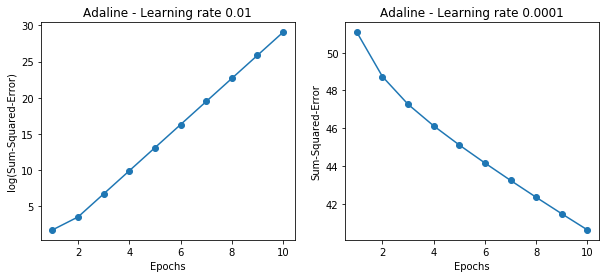

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#load and prepare data
df = pd.read_csv('datasets/iris.data', header=None)    # offline
# select setosa and vesicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
x = df.iloc[0:100, [0, 2]].values

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(x, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),
           np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-Squared-Error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(x, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),
           ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-Squared-Error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

As we can see in the resulting cost-function plots, we encountered two different types of problem. The left chart shows what could happen if we choose a learning rate that is too large. Instead of minimizing the cost function, the error becomes larger in every epoch, because we **overshoot** the global minimum. On the other hand, we can see that the cost decreases on the right plot, but the chosen learning rate $\eta$ is so small that the algorithm would require a very large number of epochs to converge to the global cost minimum.

The following figure illustrates what might happen if we change the value of a particular weight parameter to minimize the cost function.

<img src="images/good_bad_learning_rate.jpeg" alt="Good and bad learning rate" title="Good and bad learning rate" width="550" height="350" />

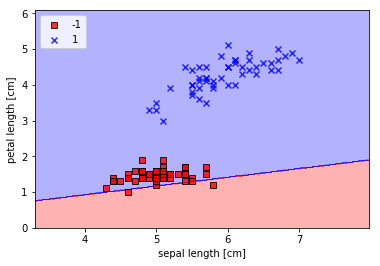

In [4]:
from plot_decision import plot_decision_regions

plot_decision_regions(x, y, classifier=ada2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## feature scaling

Many machine learning algorithms that we will encounter throughout this book require some sort of feature scaling for optimal performance. Gradient descent is one of the many algorithms that benefit from feature scaling. we will use a feature scaling method called **standardization**. Standardization shifts the mean of each feature so that it is centered at zero and each feature has a standard deviation of 1. For instance, to standardize the *jth* feature, we can simply subtract the sample mean $\mu_j$ from every training sample and divide it by its standard deviation $\sigma_j$:

\begin{equation*}
x'_j = \frac{x_j - \mu_j}{\sigma_j}
\end{equation*}

One of the reasons why standardization helps with gradient descent learning is that the optimizer has to go through fewer steps to find a good or optimal solution (the global cost minimum), as illustrated in the following figure:

<img src="images/gradient_standarization.jpg" alt="Good and bad learning rate" title="Good and bad learning rate" width="550" height="350" />

In [5]:
# standardization in python
X_std = np.copy(x)
X_std[:, 0] = (x[:, 0] - x[:, 0].mean()) / x[:, 0].std()
X_std[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()

X_std[:5, :]

array([[-0.5810659 , -1.01435952],
       [-0.89430898, -1.01435952],
       [-1.20755205, -1.08374115],
       [-1.36417359, -0.94497788],
       [-0.73768744, -1.01435952]])

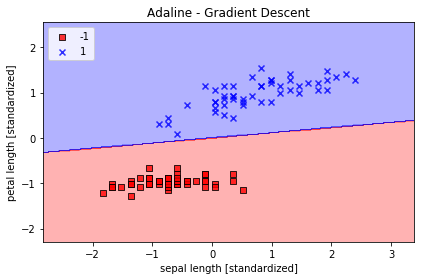

In [6]:
# train Adaline again and see what's happened
ada_std = AdalineGD(n_iter=15, eta=0.01).fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_std)
plt.title("Adaline - Gradient Descent")
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

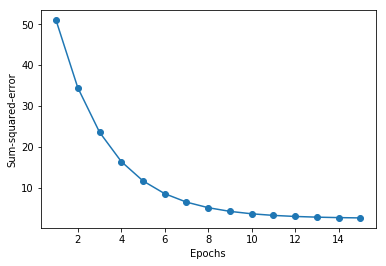

In [7]:
plt.plot(range(1, len(ada_std.cost_) + 1), ada_std.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

## stochastic gradient descent

we learned how to minimize a cost function by taking a step in the opposite direction of a cost gradient that is calculated from the whole training set; this is why this approach is sometimes also referred to as **batch gradient descent**. Running batch gradient descent can be computationally quite costly in scenarios with a large data set since we need to reevaluate the whole training dataset each time we take one step towards the global minimum. A popular alternative to the batch gradient descent algorithm is **stochastic gradient descent**, sometimes also called iterative or **online gradient descent**.

Instead of updating the weights based on the sum of the accumulated errors over all samples $x^{(i)}$

\begin{equation*}
\Delta w = \eta \sum_i \left( y^{(i) - \phi\left( x^{(i)} \right)} \right) x^{(i)}
\end{equation*}

We update the weights incrementally for each training sample:

\begin{equation*}
\eta \left( y^{(i)} - \phi \left( z^{(i)}\right) \right) x^{(i)}
\end{equation*}

To obtain satisfying results via stochastic gradient descent, it is important to present it training data in a random order; also, we want to shuffle the training set for every epoch to prevent cycles.

Another advantage of stochastic gradient descent is that we can use it for online learning. In online learning, our model is trained on the fly as new training data arrives. This is especially useful if we are accumulating large amounts of data, for example, customer data in web applications. 

In [8]:
class AdalineSGD(AdalineGD):
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        AdalineGD.__init__(self, eta=eta, n_iter=n_iter, random_state=random_state)
        self.w_initialized = False
        self.shuffle = shuffle

    def fit(self, x, y):
        self._initialize_wirghts(x.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                x, y = self._shuffle(x, y)
            cost = []
            for xi, target in zip(x, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def _shuffle(self, x, y):
        """
        Shuffle trainig data
        """
        r = self.rgen.permutation((len(y)))
        return x[r], y[r]

    def _initialize_wirghts(self, m):
        """
        Initialize weights to small random numbers
        :param m:
        """
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1+m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """
        Apply Adaline learning rule to update the weights
        """
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def partial_fit(self, x, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_wirghts(x.shape[1])

        if y.ravel().shape[0] > 1:
            for xi, target in zip(x, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(x, y)
        return self

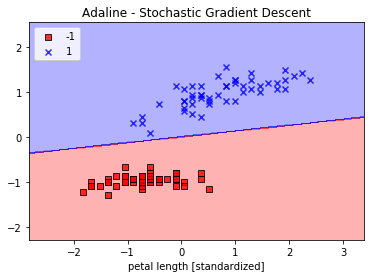

In [9]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.xlabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

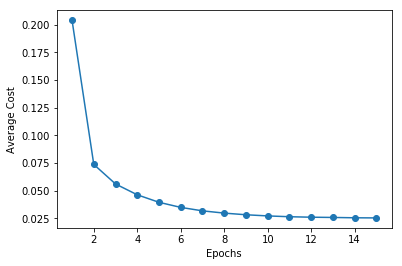

In [10]:
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()